In [1]:
import pandas as pd
import openpyxl
import nltk
from nltk import word_tokenize
import re
import random as r
import spacy
#from spacy import displacy

PATH = r'C:/Users/user/Desktop/MSc/AI6122'

C:\Users\user\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## DATA PREPROCESSING

In [2]:
phone_df = pd.read_json(PATH+"/reviews_Cell_Phones_and_Accessories_5.json.gz", compression='gzip', lines=True)

In [3]:
phone_df.head(10)

reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   
5   APX47D16JOP7H  120401325X               RLH  [1, 2]   
6  A1JVVYYO7G56DS  120401325X       Tyler Evans  [0, 0]   
7   A6FGO4TBZ3QFZ  3998899561  Abdullah Albyati  [1, 2]   
8  A2JWEDW5FSVB0F  3998899561              Adam  [2, 3]   
9   A8AJS1DW7L3JJ  3998899561   Agata Majchrzak  [1, 1]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   
5  These make using the home button easy. My daug...        3   
6  Came just as described.. It doesn't come unstu...        5   
7  it worked for the first week then it only char...        1   
8  Good case, solid build. Protects phone all aro...        5   
9  This is a fantastic case. Very stylish and pro...        5   

                                     summary  unixReviewTime   reviewTime  
0                                 Looks Good      1400630400  05 21, 2014  
1                      Really great product.      1389657600  01 14, 2014  
2                             LOVE LOVE LOVE      1403740800  06 26, 2014  
3                                      Cute!      1382313600  10 21, 2013  
4  leopard home button sticker for iphone 4s      1359849600   02 3, 2013  
5                                       Cute      1381536000  10 12, 2013  
6                          best thing ever..      1377129600  08 22, 2013  
7                            not a good Idea      1384992000  11 21, 2013  
8                                 Solid Case      1380067200  09 25, 2013  
9                               Perfect Case      1396483200   04 3, 2014

In [4]:
phone_df.shape

(194439, 9)

In [5]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [6]:
phone_review = phone_df['reviewText']
phone_review.head()

0    They look good and stick good! I just don't li...
1    These stickers work like the review says they ...
2    These are awesome and make my phone look so st...
3    Item arrived in great time and was in perfect ...
4    awesome! stays on, and looks great. can be use...
Name: reviewText, dtype: object

In [7]:
gourmet_df = pd.read_json(PATH+"/reviews_Grocery_and_Gourmet_Food_5.json.gz", compression='gzip', lines= True)

In [8]:
gourmet_df.head(10)

reviewerID        asin                     reviewerName  helpful  \
0  A1VEELTKS8NLZB  616719923X                  Amazon Customer   [0, 0]   
1  A14R9XMZVJ6INB  616719923X                          amf0001   [0, 1]   
2  A27IQHDZFQFNGG  616719923X                          Caitlin   [3, 4]   
3  A31QY5TASILE89  616719923X                     DebraDownSth   [0, 0]   
4  A2LWK003FFMCI5  616719923X                         Diana X.   [1, 2]   
5  A1NZJTY0BAA2SK  616719923X                        Elizabeth   [0, 1]   
6   AA95FYFIP38RM  616719923X  Emily Veinglory "Book Reviewer"   [1, 2]   
7  A3FIVHUOGMUMPK  616719923X                        greenlife   [2, 3]   
8  A27FSPAMTQF1J8  616719923X                           Japhyl   [0, 0]   
9  A33NXNZ79H5K51  616719923X                      Jean M "JM"  [0, 10]   

                                          reviewText  overall  \
0  Just another flavor of Kit Kat but the taste i...        4   
1  I bought this on impulse and it comes from Jap...        3   
2  Really good. Great gift for any fan of green t...        4   
3  I had never had it before, was curious to see ...        5   
4  I've been looking forward to trying these afte...        4   
5  These Kit-kats are very good, but if you're lo...        4   
6  I found these in a Mitsuwa Marketplace in Illi...        3   
7  Creamy white chocolate infused with Matcha gre...        5   
8  After hearing mixed opinions about these Kit K...        5   
9  I love green tea, I love Kit Kats, but the two...        1   

                                             summary  unixReviewTime  \
0                                         Good Taste      1370044800   
1  3.5 stars,  sadly not as wonderful as I had hoped      1400457600   
2                                               Yum!      1381190400   
3                             Unexpected flavor meld      1369008000   
4  Not a very strong tea flavor, but still yummy ...      1369526400   
5                                             Subtle      1378339200   
6                        Available in some US stores      1382054400   
7                                     So Delicious!!      1372982400   
8                These are my favorite candies ever!      1371168000   
9                                          Not a fan      1348012800   

    reviewTime  
0   06 1, 2013  
1  05 19, 2014  
2   10 8, 2013  
3  05 20, 2013  
4  05 26, 2013  
5   09 5, 2013  
6  10 18, 2013  
7   07 5, 2013  
8  06 14, 2013  
9  09 19, 2012

In [9]:
gourmet_df.shape

(151254, 9)

In [10]:
gourmet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      151254 non-null  object
 1   asin            151254 non-null  object
 2   reviewerName    149761 non-null  object
 3   helpful         151254 non-null  object
 4   reviewText      151254 non-null  object
 5   overall         151254 non-null  int64 
 6   summary         151254 non-null  object
 7   unixReviewTime  151254 non-null  int64 
 8   reviewTime      151254 non-null  object
dtypes: int64(2), object(7)
memory usage: 10.4+ MB


In [11]:
gourmet_review = gourmet_df['reviewText']
print(gourmet_review)

0         Just another flavor of Kit Kat but the taste i...
1         I bought this on impulse and it comes from Jap...
2         Really good. Great gift for any fan of green t...
3         I had never had it before, was curious to see ...
4         I've been looking forward to trying these afte...
                                ...                        
151249    Delicious gluten-free oatmeal: we tried both t...
151250    With the many selections of instant oatmeal ce...
151251    While I usually review CDs and DVDs, as well a...
151252    My son and I enjoyed these oatmeal packets.  H...
151253    I like to eat oatmeal i the mornings. I usuall...
Name: reviewText, Length: 151254, dtype: object


In [12]:
def clean_data(data):
    
    data = re.sub('\W+', ' ',data) #symbols
    data = re.sub('\s+', ' ', data) #new line characters
    data = re.sub("\''", "", data) #quotations
    
    return data

In [13]:
#cleaning texts

gourmet_reviewlist = []
phone_reviewlist = []

gourmet_tolist = gourmet_review.values.tolist()
phone_tolist = phone_review.values.tolist()

for i in range(len(gourmet_tolist)):
    gourmet_reviewlist.append(clean_data(gourmet_tolist[i]))

for i in range(len(phone_tolist)):
    phone_reviewlist.append(clean_data(phone_tolist[i]))

In [251]:
#lower casing words
gourmet_review = [x.lower() for x in gourmet_reviewlist]
phone_review = [y.lower() for y in phone_reviewlist]
#print(gourmet_review[1])

In [252]:
print(phone_review[1])

these stickers work like the review says they do they stick on great and they stay on the phone they are super stylish and i can share them with my sister 


In [209]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [217]:
#removing stopwords
from nltk.corpus import stopwords

In [219]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [255]:
stop_words = stopwords.words('english')
gourmet_tokenize = [word_tokenize(i) for i in gourmet_review]
phone_tokenize = [word_tokenize(j) for j in phone_review]

In [636]:
len(gourmet_review)

151254

In [637]:
length_G = len(gourmet_review)
length_P = len(phone_review)

In [245]:
#removing stopwords in Grocery Gourmet data
filtersw_g = []

for i in range(length_G):
    row = []
    for j in gourmet_tokenize[i]:
        if j not in stop_words:
            row.append(j)
    filtersw_g.append(row)


In [256]:
#removing stopwords in phone data
filtersw_p = []

for i in range(length_P):
    row1 = []
    for j in phone_tokenize[i]:
        if j not in stop_words:
            row1.append(j)
    filtersw_p.append(row1)

In [247]:
print(gourmet_tokenize[1])
print(filtersw_g[1])

['i', 'bought', 'this', 'on', 'impulse', 'and', 'it', 'comes', 'from', 'japan', 'which', 'amused', 'my', 'family', 'all', 'those', 'weird', 'stamps', 'and', 'markings', 'on', 'the', 'package', 'so', 'that', 'was', 'fun', 'it', 'said', 'it', 'would', 'take', 'about', 'a', 'month', 'to', 'arrive', 'and', 'it', 'did', 'take', 'that', 'long', 'i', 'was', 'hoping', 'for', 'a', 'more', 'interesting', 'taste', 'but', 'to', 'our', 'family', 'it', 'just', 'tasted', 'a', 'bit', 'less', 'flavorful', 'or', 'weaker', 'than', 'the', 'standard', 'milk', 'chocolate', 'kit', 'kat', 'the', 'green', 'tea', 'flavor', 'was', 'too', 'subtle', 'for', 'the', 'sugar', 'and', 'it', 'just', 'tasted', 'sweet', 'the', 'wafers', 'were', 'very', 'crispy', 'and', 'that', 'was', 'good', 'but', 'it', 'tasted', 'a', 'bit', 'anemic', 'to', 'us', 'i', 'm', 'happy', 'i', 'bought', 'it', 'but', 'don', 't', 'need', 'to', 'buy', 'it', 'again']
['bought', 'impulse', 'comes', 'japan', 'amused', 'family', 'weird', 'stamps', 'mar

In [257]:
print(phone_tokenize[1])
print(filtersw_p[1])

['these', 'stickers', 'work', 'like', 'the', 'review', 'says', 'they', 'do', 'they', 'stick', 'on', 'great', 'and', 'they', 'stay', 'on', 'the', 'phone', 'they', 'are', 'super', 'stylish', 'and', 'i', 'can', 'share', 'them', 'with', 'my', 'sister']
['stickers', 'work', 'like', 'review', 'says', 'stick', 'great', 'stay', 'phone', 'super', 'stylish', 'share', 'sister']


## POS TAGGING

### Gourmet

In [488]:
#random sample of 5

random_gourmet = r.choices(gourmet_reviewlist, k=5)
#print(gourmet_words)
#random_gourmet
#len(random_gourmet)


In [489]:
print(random_gourmet[1])

Very good flavor only a bit of alcohol away from being perfect Freezing some of it makes great flavored icecubes for drinks Dissolves quick to so you don t spend half an hour shaking or stirring before you get to enjoy it 


In [490]:
gourmet_tokens = [word_tokenize(i) for i in random_gourmet]

#print(gourmet_tokens)

gourmet_POS = nltk.pos_tag(gourmet_tokens[1],tagset="universal")
print(gourmet_POS)

[('Very', 'ADV'), ('good', 'ADJ'), ('flavor', 'NOUN'), ('only', 'ADV'), ('a', 'DET'), ('bit', 'NOUN'), ('of', 'ADP'), ('alcohol', 'NOUN'), ('away', 'ADV'), ('from', 'ADP'), ('being', 'VERB'), ('perfect', 'ADJ'), ('Freezing', 'VERB'), ('some', 'DET'), ('of', 'ADP'), ('it', 'PRON'), ('makes', 'VERB'), ('great', 'ADJ'), ('flavored', 'ADJ'), ('icecubes', 'NOUN'), ('for', 'ADP'), ('drinks', 'NOUN'), ('Dissolves', 'NOUN'), ('quick', 'VERB'), ('to', 'PRT'), ('so', 'ADV'), ('you', 'PRON'), ('don', 'VERB'), ('t', 'ADJ'), ('spend', 'VERB'), ('half', 'DET'), ('an', 'DET'), ('hour', 'NOUN'), ('shaking', 'NOUN'), ('or', 'CONJ'), ('stirring', 'VERB'), ('before', 'ADP'), ('you', 'PRON'), ('get', 'VERB'), ('to', 'PRT'), ('enjoy', 'VERB'), ('it', 'PRON')]


### Phone

In [512]:
random_phone = r.choices(phone_reviewlist, k=5)

In [513]:
print(random_phone[4])

These screen protectors are better than some of the more expensive ones I have bought 


In [499]:
phone_tokens = [word_tokenize(i) for i in random_phone]

phone_POS = nltk.pos_tag(phone_tokens[4],tagset="universal")
print(phone_POS)

[('Works', 'VERB'), ('great', 'ADJ'), ('in', 'ADP'), ('my', 'PRON'), ('verizon', 'ADJ'), ('note', 'NOUN'), ('2', 'NUM'), ('however', 'ADV'), ('it', 'PRON'), ('is', 'VERB'), ('harder', 'ADJ'), ('to', 'PRT'), ('get', 'VERB'), ('out', 'PRT'), ('than', 'ADP'), ('the', 'DET'), ('one', 'NOUN'), ('that', 'DET'), ('came', 'VERB'), ('with', 'ADP'), ('the', 'DET'), ('phone', 'NOUN'), ('originally', 'ADV')]


#### some library downloads

In [114]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [115]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

### Without removal 

In [131]:
#print(gourmet_tolist[:4])
sample_gourmet = r.choices(gourmet_tolist, k=5)
print(sample_gourmet)

["I'm a pulp guy. I'd buy extra pulp orange juice if they sold it. Those bits of fruit make it seem as if I am getting the real deal in nutrition. This tea is pulpy too thankfully, and that's not for everyone based on the other reviews I am seeing.Taste-wise, I found the combination just okay. I think it is the passion fruit that dominates the taste. I don't think I've every had a passion fruit by itself, but I suspect that I would find the fruit average. Bottom line is that I would drink this if I had nothing else refreshing in the house to drink, but ultimately I would seek another drink product if I could.", "I've had these before and they were delish so imagine how excited I was to find them again.  Now, imagine how heartbroken I was when I sampled them and found several packages of broken cookies.  Individually wrapped cookies are great, individually wrapped cookie crumbs, not so much.  To top it off, the cookies didn't taste nearly as good as I remembered.  These seem dry instead

In [141]:
print(sample_gourmet[0])

I'm a pulp guy. I'd buy extra pulp orange juice if they sold it. Those bits of fruit make it seem as if I am getting the real deal in nutrition. This tea is pulpy too thankfully, and that's not for everyone based on the other reviews I am seeing.Taste-wise, I found the combination just okay. I think it is the passion fruit that dominates the taste. I don't think I've every had a passion fruit by itself, but I suspect that I would find the fruit average. Bottom line is that I would drink this if I had nothing else refreshing in the house to drink, but ultimately I would seek another drink product if I could.


In [142]:
unclean_gourmet_tokens = [word_tokenize(i) for i in sample_gourmet]
print(unclean_gourmet_tokens)

#unclean_gourmet_POS = nltk.pos_tag(unclean_gourmet_tokens[0],tagset="universal")
#print(unclean_gourmet_POS)

[['I', "'m", 'a', 'pulp', 'guy', '.', 'I', "'d", 'buy', 'extra', 'pulp', 'orange', 'juice', 'if', 'they', 'sold', 'it', '.', 'Those', 'bits', 'of', 'fruit', 'make', 'it', 'seem', 'as', 'if', 'I', 'am', 'getting', 'the', 'real', 'deal', 'in', 'nutrition', '.', 'This', 'tea', 'is', 'pulpy', 'too', 'thankfully', ',', 'and', 'that', "'s", 'not', 'for', 'everyone', 'based', 'on', 'the', 'other', 'reviews', 'I', 'am', 'seeing.Taste-wise', ',', 'I', 'found', 'the', 'combination', 'just', 'okay', '.', 'I', 'think', 'it', 'is', 'the', 'passion', 'fruit', 'that', 'dominates', 'the', 'taste', '.', 'I', 'do', "n't", 'think', 'I', "'ve", 'every', 'had', 'a', 'passion', 'fruit', 'by', 'itself', ',', 'but', 'I', 'suspect', 'that', 'I', 'would', 'find', 'the', 'fruit', 'average', '.', 'Bottom', 'line', 'is', 'that', 'I', 'would', 'drink', 'this', 'if', 'I', 'had', 'nothing', 'else', 'refreshing', 'in', 'the', 'house', 'to', 'drink', ',', 'but', 'ultimately', 'I', 'would', 'seek', 'another', 'drink', '

## SENTENCE SEGMENTATION

In [20]:
nlp = spacy.load("en_core_web_sm") #importing english language model

In [21]:
print(gourmet_tolist[2])
len(gourmet_tolist)

Really good. Great gift for any fan of green tea! Just so expensive to purchase candy from across the sea.


151254

### Groceries and Gourmet

In [22]:
segment_G = [nlp(i) for i in gourmet_tolist]

In [24]:
 #segmenting a list of sentences and compiling its sentence counts
sent_count_G = []

for i in range(length_G):
    
    sent_count_G.append(len(list(segment_G[i].sents)))

print(sent_count_G)
len(sent_count_G)

[3, 7, 3, 3, 8, 2, 4, 6, 5, 2, 4, 2, 5, 1, 3, 4, 3, 3, 7, 5, 9, 4, 3, 21, 2, 6, 3, 2, 6, 3, 4, 8, 6, 3, 2, 5, 3, 5, 7, 5, 6, 17, 17, 19, 7, 2, 3, 5, 4, 4, 10, 4, 4, 9, 7, 3, 4, 6, 9, 3, 10, 8, 2, 8, 4, 1, 6, 5, 3, 7, 3, 5, 5, 3, 4, 9, 3, 5, 9, 2, 2, 2, 13, 14, 3, 3, 3, 12, 1, 5, 2, 8, 2, 6, 3, 3, 6, 2, 5, 3, 2, 5, 14, 28, 2, 21, 81, 5, 2, 23, 4, 2, 3, 6, 10, 29, 3, 7, 1, 13, 19, 2, 3, 3, 14, 6, 10, 12, 8, 5, 7, 2, 12, 4, 7, 5, 6, 4, 3, 2, 8, 8, 4, 7, 12, 2, 4, 6, 4, 3, 1, 2, 3, 1, 10, 3, 9, 3, 1, 5, 14, 2, 1, 4, 3, 7, 5, 2, 1, 7, 8, 8, 3, 1, 5, 3, 18, 7, 1, 7, 8, 1, 5, 17, 9, 18, 4, 8, 19, 4, 11, 7, 3, 10, 5, 3, 5, 6, 3, 3, 4, 3, 6, 6, 2, 3, 3, 6, 4, 4, 8, 3, 3, 4, 4, 5, 3, 9, 2, 6, 5, 5, 4, 5, 5, 1, 2, 3, 3, 5, 4, 2, 2, 3, 3, 2, 5, 2, 3, 2, 12, 2, 3, 6, 15, 2, 4, 3, 5, 4, 3, 3, 3, 2, 3, 3, 4, 3, 5, 2, 4, 4, 4, 14, 14, 9, 8, 8, 16, 4, 6, 15, 6, 10, 8, 6, 3, 1, 5, 7, 7, 11, 4, 2, 5, 4, 8, 6, 3, 2, 9, 3, 2, 7, 8, 22, 8, 19, 4, 20, 1, 13, 3, 4, 5, 2, 4, 4, 6, 4, 3, 2, 4, 5, 5, 2, 6, 7, 5,

151254

In [39]:
from collections import Counter
import matplotlib.pyplot as plt

In [40]:
data_g = sent_count_G
count_g = Counter(data_g)
#print(count_g)

Counter({3: 25067, 4: 21638, 2: 18124, 5: 17030, 6: 13255, 7: 10611, 8: 8113, 9: 6488, 1: 5349, 10: 4954, 11: 3942, 12: 3024, 13: 2439, 14: 1971, 15: 1604, 16: 1304, 17: 1044, 18: 850, 19: 697, 20: 539, 21: 488, 22: 379, 23: 356, 24: 268, 25: 224, 26: 164, 27: 160, 29: 132, 28: 127, 30: 102, 33: 73, 32: 70, 31: 68, 35: 57, 34: 49, 36: 45, 37: 40, 38: 38, 41: 36, 39: 27, 43: 24, 0: 22, 42: 21, 40: 21, 48: 15, 47: 14, 45: 14, 51: 14, 46: 13, 55: 12, 54: 12, 44: 11, 50: 10, 52: 10, 49: 9, 61: 7, 53: 5, 56: 5, 60: 5, 65: 5, 62: 4, 69: 4, 58: 4, 76: 4, 81: 3, 66: 3, 70: 3, 71: 3, 59: 3, 57: 3, 68: 3, 63: 2, 64: 2, 67: 2, 83: 2, 87: 2, 86: 1, 99: 1, 78: 1, 75: 1, 234: 1, 184: 1, 130: 1, 95: 1, 72: 1, 79: 1, 116: 1, 100: 1})


In [55]:
print(count_g.keys())
print(count_g.values())

dict_keys([3, 7, 8, 2, 4, 6, 5, 1, 9, 21, 17, 19, 10, 13, 14, 12, 28, 81, 23, 29, 18, 11, 15, 16, 22, 20, 25, 24, 86, 47, 39, 37, 32, 38, 34, 30, 36, 35, 26, 66, 63, 45, 55, 62, 31, 27, 61, 48, 0, 64, 43, 69, 41, 33, 67, 42, 54, 50, 49, 99, 40, 78, 58, 52, 53, 46, 44, 51, 70, 83, 76, 75, 234, 71, 59, 184, 56, 57, 87, 60, 65, 130, 95, 72, 79, 116, 68, 100])
dict_values([25067, 10611, 8113, 18124, 21638, 13255, 17030, 5349, 6488, 488, 1044, 697, 4954, 2439, 1971, 3024, 127, 3, 356, 132, 850, 3942, 1604, 1304, 379, 539, 224, 268, 1, 14, 27, 40, 70, 38, 49, 102, 45, 57, 164, 3, 2, 14, 12, 4, 68, 160, 7, 15, 22, 2, 24, 4, 36, 73, 2, 21, 12, 10, 9, 1, 21, 1, 4, 10, 5, 13, 11, 14, 3, 2, 4, 1, 1, 3, 3, 1, 5, 3, 2, 5, 5, 1, 1, 1, 1, 1, 3, 1])


In [646]:
max(count_g)

234

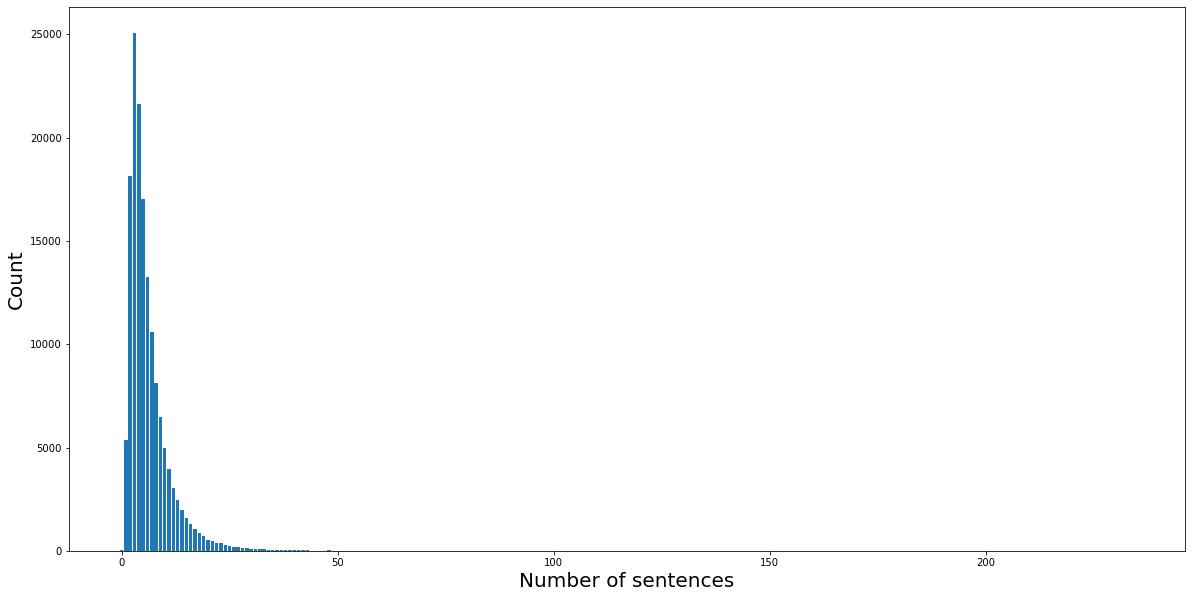

In [648]:
plt.figure(figsize=(20,10))
plt.bar(count_g.keys(),count_g.values())

plt.xlabel("Number of sentences",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('sent_count_gour.png')

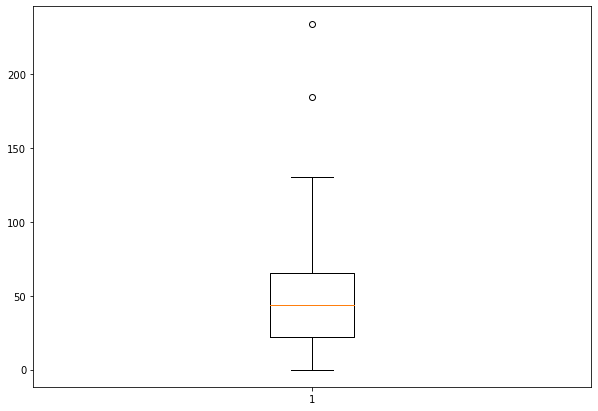

In [643]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(count_g.keys())
 
# show plot
plt.show()

### Phone

In [23]:
segment_P = [nlp(i) for i in phone_tolist]

In [50]:
sent_count_P = []

for i in range(length_P):
    
    sent_count_P.append(len(list(segment_P[i].sents)))

print(sent_count_P)
len(sent_count_P)

[4, 4, 5, 4, 3, 4, 3, 2, 6, 5, 2, 7, 5, 11, 4, 3, 4, 4, 12, 2, 3, 1, 2, 2, 5, 4, 2, 5, 1, 3, 2, 3, 4, 1, 1, 3, 2, 4, 1, 5, 2, 4, 4, 2, 14, 3, 4, 2, 2, 1, 3, 17, 2, 3, 4, 3, 3, 2, 4, 3, 3, 6, 2, 2, 2, 2, 5, 6, 1, 3, 1, 2, 4, 2, 5, 2, 3, 4, 4, 2, 3, 2, 4, 1, 4, 13, 2, 3, 9, 3, 3, 3, 4, 4, 3, 2, 3, 2, 7, 1, 1, 8, 1, 2, 5, 4, 3, 3, 3, 3, 2, 2, 1, 2, 3, 2, 3, 3, 1, 4, 5, 4, 4, 2, 4, 7, 2, 2, 2, 2, 3, 4, 11, 3, 3, 2, 2, 1, 5, 2, 7, 4, 3, 9, 1, 3, 3, 4, 2, 4, 2, 3, 4, 2, 2, 3, 1, 1, 3, 4, 4, 2, 5, 5, 2, 2, 3, 5, 3, 2, 7, 3, 5, 2, 3, 2, 4, 3, 2, 4, 2, 3, 1, 5, 2, 7, 3, 2, 6, 3, 5, 2, 5, 3, 2, 5, 4, 1, 2, 5, 1, 3, 4, 3, 2, 11, 1, 1, 2, 5, 5, 1, 7, 3, 4, 3, 7, 2, 2, 6, 5, 1, 3, 5, 3, 4, 4, 8, 5, 3, 1, 7, 4, 4, 2, 4, 2, 2, 3, 2, 2, 2, 4, 2, 2, 1, 2, 1, 3, 4, 6, 3, 3, 2, 3, 2, 5, 5, 4, 3, 3, 3, 10, 3, 5, 5, 3, 2, 3, 1, 2, 2, 2, 2, 8, 1, 3, 2, 6, 2, 5, 3, 4, 6, 4, 2, 3, 3, 2, 3, 4, 4, 3, 2, 3, 3, 1, 7, 6, 6, 9, 3, 1, 8, 2, 5, 2, 12, 6, 3, 3, 3, 4, 4, 6, 1, 4, 3, 4, 17, 2, 9, 1, 6, 2, 3, 1, 2, 6, 3,

194439

In [51]:
data_p = sent_count_P
count_p = Counter(data_p)
print(count_p)

Counter({3: 37374, 2: 33118, 4: 26806, 5: 17765, 1: 16551, 6: 12310, 7: 8894, 8: 6785, 9: 5336, 10: 4248, 11: 3496, 12: 2880, 13: 2437, 14: 1977, 15: 1710, 16: 1419, 17: 1303, 18: 1071, 19: 956, 20: 899, 21: 752, 22: 641, 23: 565, 24: 492, 25: 403, 26: 389, 27: 314, 28: 295, 29: 265, 30: 248, 31: 212, 33: 178, 32: 176, 34: 153, 35: 151, 36: 119, 37: 111, 39: 103, 0: 99, 38: 98, 41: 84, 40: 79, 42: 76, 47: 66, 44: 59, 43: 56, 45: 54, 46: 53, 50: 47, 48: 38, 53: 35, 49: 34, 51: 32, 54: 31, 52: 30, 57: 28, 56: 27, 61: 23, 60: 23, 58: 20, 64: 19, 59: 19, 63: 19, 65: 17, 66: 15, 70: 15, 55: 15, 68: 14, 69: 13, 62: 12, 73: 12, 72: 12, 71: 11, 74: 10, 67: 10, 81: 9, 79: 8, 75: 8, 77: 7, 76: 7, 83: 7, 88: 7, 78: 7, 92: 6, 131: 6, 85: 6, 86: 6, 94: 5, 95: 5, 91: 5, 105: 5, 112: 5, 99: 4, 107: 4, 90: 4, 104: 4, 87: 4, 80: 4, 147: 4, 84: 4, 97: 4, 96: 3, 132: 3, 146: 3, 129: 3, 115: 3, 111: 3, 89: 3, 100: 2, 118: 2, 128: 2, 116: 2, 102: 2, 122: 2, 103: 2, 139: 2, 108: 2, 130: 2, 125: 2, 176: 2, 1

In [53]:
print(count_p.keys())
print(count_p.values())

dict_keys([4, 5, 3, 2, 6, 7, 11, 12, 1, 14, 17, 13, 9, 8, 10, 15, 23, 16, 26, 18, 21, 0, 19, 38, 24, 61, 44, 25, 20, 22, 31, 54, 145, 41, 45, 52, 56, 32, 28, 29, 46, 34, 64, 49, 36, 33, 27, 40, 35, 94, 66, 42, 62, 37, 74, 67, 77, 43, 30, 59, 50, 47, 99, 58, 107, 48, 57, 39, 51, 79, 81, 92, 60, 70, 95, 76, 109, 65, 53, 96, 90, 69, 104, 83, 100, 118, 87, 80, 88, 147, 63, 71, 128, 84, 148, 199, 116, 73, 106, 132, 131, 133, 159, 55, 85, 135, 119, 203, 171, 68, 78, 174, 146, 91, 86, 142, 105, 112, 75, 102, 129, 122, 72, 252, 115, 103, 188, 111, 139, 108, 213, 101, 130, 89, 125, 176, 97, 113, 98, 157, 180, 261, 124, 82, 315, 177, 243, 93, 123, 137, 110, 163, 175, 150, 120, 121, 155, 170, 164])
dict_values([26806, 17765, 37374, 33118, 12310, 8894, 3496, 2880, 16551, 1977, 1303, 2437, 5336, 6785, 4248, 1710, 565, 1419, 389, 1071, 752, 99, 956, 98, 492, 23, 59, 403, 899, 641, 212, 31, 1, 84, 54, 30, 27, 176, 295, 265, 53, 153, 19, 34, 119, 178, 314, 79, 151, 5, 15, 76, 12, 111, 10, 10, 7, 56, 2

In [ ]:
print(phone_tolist[])

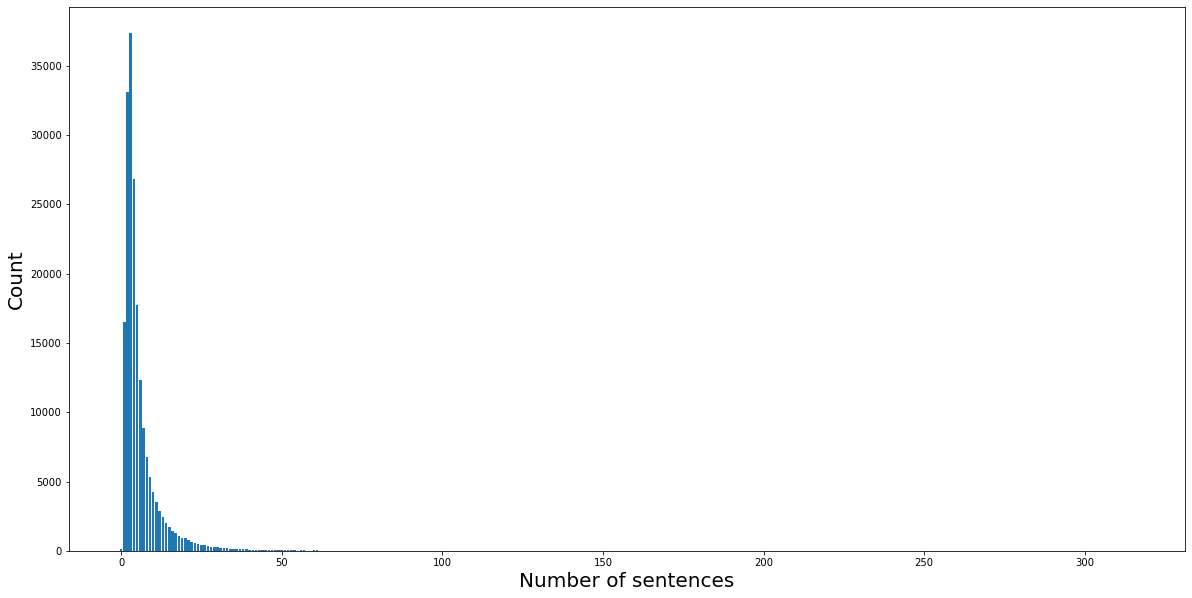

In [108]:
plt.figure(figsize=(20,10))
plt.bar(count_p.keys(),count_p.values())
plt.xlabel("Number of sentences",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('sent_count_ph.png')

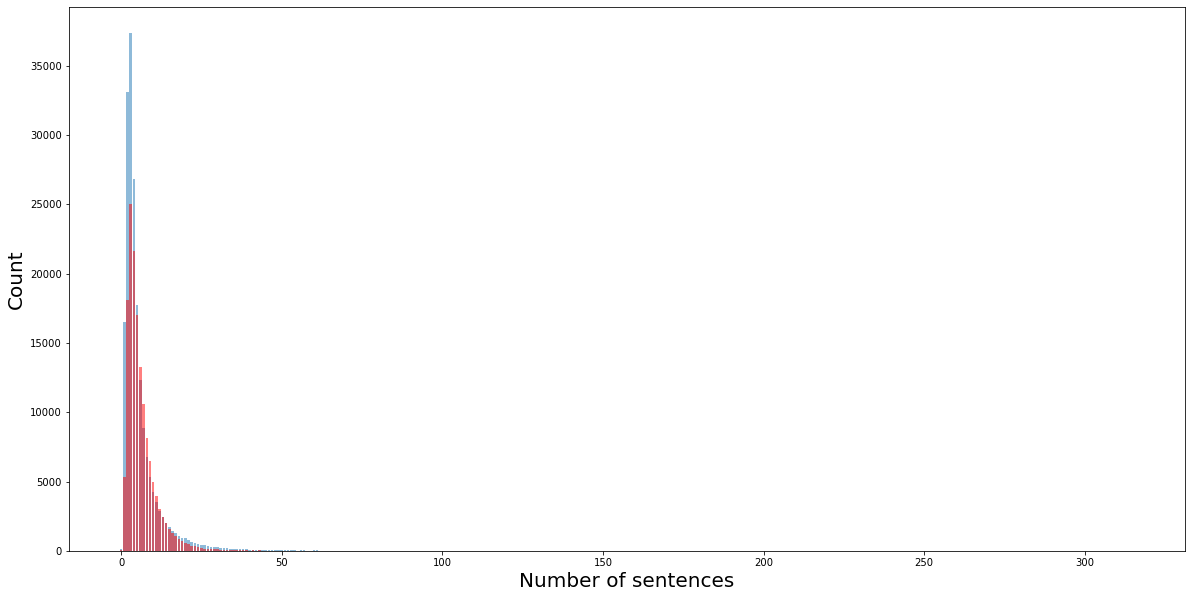

In [658]:
plt.figure(figsize=(20,10))
plt.bar(count_p.keys(),count_p.values(),alpha=0.5)
plt.bar(count_g.keys(),count_g.values(),alpha=0.5,color='red')
plt.xlabel("Number of sentences",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('sent_count_duo.png')

## TOKENIZATION AND STEMMING

### WITHOUT STEMMING

### Groceries and Gourmet

In [56]:
gourmet_tokens_all = [word_tokenize(i) for i in gourmet_tolist] #tokenization 

In [69]:
tokenG_count = []

for i in range(length_G):
    tG = len(gourmet_tokens_all[i])
    tokenG_count.append(tG)
    
print(tokenG_count)
len(tokenG_count)

[34, 128, 23, 35, 126, 30, 57, 84, 88, 26, 67, 31, 62, 45, 26, 65, 41, 63, 111, 59, 125, 55, 69, 507, 28, 79, 70, 24, 101, 38, 48, 99, 123, 61, 42, 64, 54, 136, 113, 70, 81, 339, 597, 306, 133, 44, 37, 77, 59, 94, 132, 51, 51, 144, 80, 43, 65, 92, 236, 60, 182, 124, 33, 90, 45, 64, 58, 99, 99, 173, 43, 70, 134, 83, 75, 109, 27, 124, 153, 22, 58, 27, 219, 316, 23, 38, 39, 192, 34, 81, 23, 131, 26, 128, 35, 44, 76, 25, 62, 43, 36, 101, 173, 349, 33, 315, 1989, 95, 67, 645, 65, 33, 55, 127, 155, 648, 56, 124, 22, 166, 399, 32, 36, 30, 335, 172, 214, 209, 206, 43, 112, 37, 161, 123, 197, 53, 136, 85, 48, 52, 99, 120, 53, 168, 257, 38, 110, 124, 43, 47, 22, 25, 29, 32, 105, 36, 141, 27, 32, 140, 236, 38, 42, 74, 49, 99, 66, 33, 20, 87, 119, 223, 52, 21, 53, 61, 330, 126, 23, 178, 131, 27, 42, 266, 114, 345, 58, 297, 331, 104, 177, 142, 46, 203, 54, 40, 70, 78, 68, 24, 50, 58, 73, 61, 35, 32, 63, 92, 67, 36, 118, 57, 55, 38, 70, 62, 24, 127, 37, 66, 83, 60, 36, 81, 72, 29, 37, 34, 37, 90, 62

151254

In [70]:
data_tg = tokenG_count
count_tg = Counter(data_tg)
print(count_tg)

Counter({26: 2317, 25: 2312, 27: 2266, 24: 2226, 28: 2048, 29: 1960, 23: 1902, 30: 1881, 31: 1865, 33: 1735, 32: 1731, 35: 1698, 34: 1689, 37: 1614, 36: 1569, 38: 1550, 39: 1505, 40: 1441, 41: 1431, 42: 1383, 43: 1365, 49: 1340, 46: 1305, 47: 1281, 44: 1277, 45: 1274, 51: 1248, 48: 1247, 52: 1241, 22: 1199, 53: 1173, 50: 1166, 54: 1147, 55: 1130, 57: 1114, 56: 1111, 58: 1087, 59: 1079, 62: 1063, 61: 1056, 64: 1050, 60: 1022, 63: 1015, 65: 964, 66: 955, 67: 952, 70: 950, 68: 943, 69: 930, 77: 907, 71: 892, 75: 886, 72: 884, 81: 867, 80: 859, 73: 858, 79: 850, 78: 840, 76: 837, 86: 835, 74: 834, 85: 833, 82: 813, 84: 786, 83: 784, 89: 773, 90: 751, 92: 744, 87: 735, 88: 713, 91: 705, 99: 698, 93: 693, 95: 688, 96: 684, 101: 683, 94: 679, 97: 672, 104: 671, 98: 651, 103: 629, 105: 601, 107: 596, 108: 596, 102: 592, 100: 590, 113: 586, 109: 584, 106: 584, 112: 582, 110: 580, 111: 564, 114: 563, 118: 558, 125: 551, 116: 540, 117: 538, 21: 530, 122: 519, 115: 516, 119: 501, 121: 492, 124: 48

In [71]:
print(count_tg.keys())
print(count_tg.values())

dict_keys([34, 128, 23, 35, 126, 30, 57, 84, 88, 26, 67, 31, 62, 45, 65, 41, 63, 111, 59, 125, 55, 69, 507, 28, 79, 70, 24, 101, 38, 48, 99, 123, 61, 42, 64, 54, 136, 113, 81, 339, 597, 306, 133, 44, 37, 77, 94, 132, 51, 144, 80, 43, 92, 236, 60, 182, 124, 33, 90, 58, 173, 134, 83, 75, 109, 27, 153, 22, 219, 316, 39, 192, 131, 76, 25, 36, 349, 315, 1989, 95, 645, 127, 155, 648, 56, 166, 399, 32, 335, 172, 214, 209, 206, 112, 161, 197, 53, 85, 52, 120, 168, 257, 110, 47, 29, 105, 141, 140, 74, 49, 66, 20, 87, 119, 223, 21, 330, 178, 266, 114, 345, 297, 331, 104, 177, 142, 46, 203, 40, 78, 68, 50, 73, 118, 72, 171, 242, 187, 130, 148, 334, 129, 170, 135, 116, 186, 71, 93, 452, 151, 260, 357, 261, 201, 115, 342, 89, 247, 98, 384, 264, 228, 174, 196, 193, 282, 181, 158, 152, 356, 396, 18, 361, 218, 102, 492, 122, 205, 227, 325, 304, 369, 13, 293, 138, 86, 165, 355, 159, 604, 281, 7, 157, 602, 303, 244, 234, 656, 82, 106, 185, 579, 285, 388, 1592, 199, 522, 381, 789, 91, 107, 164, 100, 176,

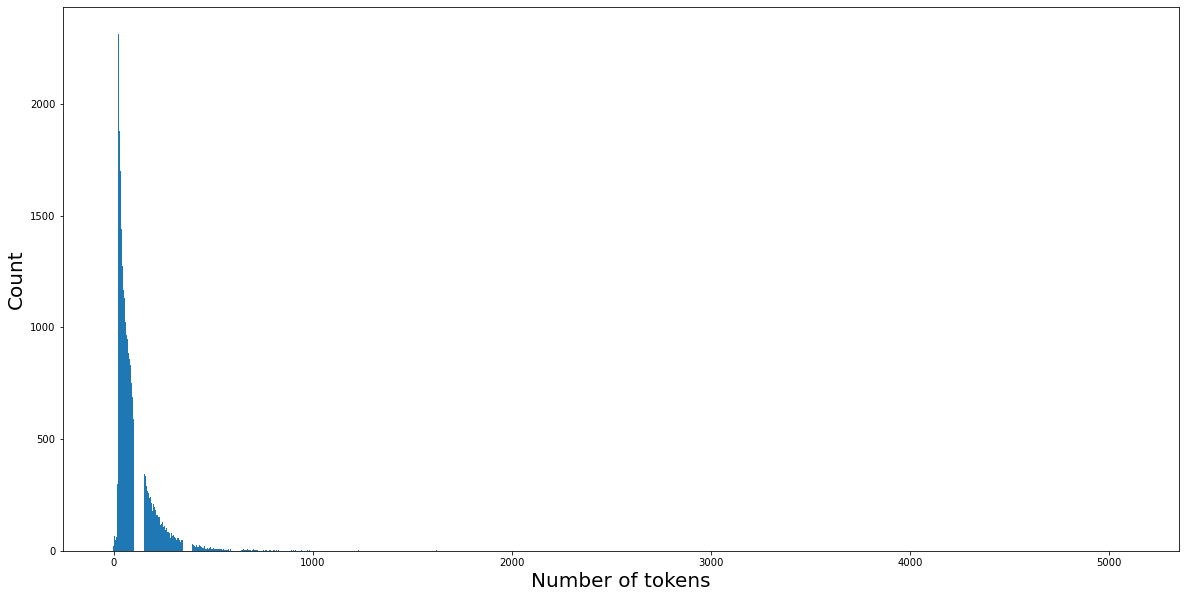

In [659]:
plt.figure(figsize=(20,10))
plt.bar(count_tg.keys(),count_tg.values())
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_gour.png')

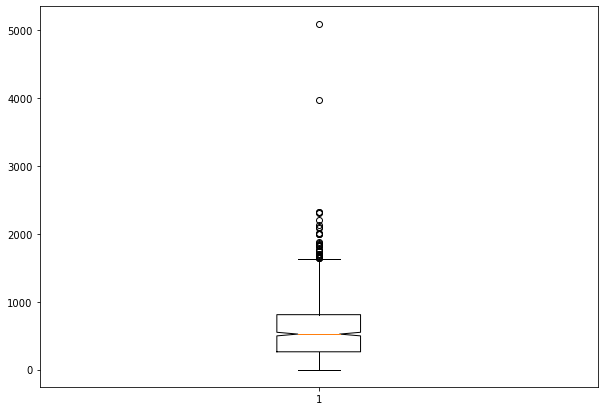

In [640]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(count_tg.keys(),count_tg.values())
 
# show plot
plt.show()

### Phone

In [57]:
phone_tokens_all = [word_tokenize(i) for i in phone_tolist]

In [73]:
tokenP_count = []

for i in range(length_P):
    tP = len(phone_tokens_all[i])
    tokenP_count.append(tP)
    
print(tokenP_count)
len(tokenP_count)

[41, 36, 40, 58, 29, 27, 28, 23, 51, 42, 23, 80, 54, 279, 42, 29, 53, 34, 110, 23, 36, 24, 23, 42, 63, 39, 24, 90, 7, 25, 41, 36, 42, 26, 30, 30, 34, 44, 16, 64, 46, 47, 30, 30, 327, 40, 55, 31, 38, 22, 49, 193, 22, 40, 27, 48, 67, 21, 32, 35, 23, 53, 27, 57, 34, 25, 67, 93, 22, 25, 39, 36, 61, 23, 63, 26, 29, 43, 37, 67, 48, 31, 67, 23, 40, 138, 36, 37, 201, 25, 25, 36, 77, 127, 36, 24, 38, 26, 158, 18, 22, 108, 33, 44, 76, 24, 28, 29, 38, 24, 29, 26, 35, 24, 26, 44, 54, 25, 20, 59, 104, 43, 25, 35, 37, 111, 53, 39, 10, 26, 35, 52, 204, 36, 44, 39, 25, 22, 123, 23, 157, 39, 30, 125, 38, 30, 22, 51, 23, 45, 24, 28, 28, 24, 32, 24, 29, 22, 45, 56, 25, 22, 114, 25, 27, 53, 29, 44, 25, 34, 161, 36, 70, 32, 29, 48, 24, 23, 22, 39, 33, 55, 23, 88, 31, 90, 35, 24, 113, 79, 87, 57, 123, 36, 30, 68, 79, 28, 36, 52, 30, 64, 92, 24, 25, 165, 23, 24, 23, 41, 163, 20, 121, 32, 63, 100, 154, 22, 26, 110, 75, 44, 25, 77, 34, 107, 99, 93, 133, 26, 23, 123, 54, 97, 30, 29, 23, 37, 27, 29, 29, 22, 53, 

194439

In [74]:
data_tp = tokenP_count
count_tp = Counter(data_tp)
print(count_tp)

Counter({24: 5264, 25: 5226, 26: 4928, 23: 4864, 27: 4654, 28: 4279, 29: 3979, 30: 3849, 31: 3387, 22: 3379, 32: 3161, 33: 3114, 34: 2858, 35: 2809, 36: 2590, 37: 2472, 38: 2407, 39: 2308, 40: 2293, 41: 2209, 42: 2104, 44: 1979, 43: 1939, 45: 1898, 47: 1783, 21: 1774, 46: 1773, 48: 1720, 49: 1648, 50: 1608, 52: 1526, 54: 1513, 53: 1482, 51: 1471, 55: 1407, 56: 1360, 59: 1324, 58: 1310, 57: 1281, 60: 1254, 62: 1223, 61: 1171, 67: 1101, 64: 1091, 65: 1081, 63: 1074, 66: 1060, 69: 1045, 70: 1030, 68: 1026, 71: 973, 73: 941, 72: 933, 74: 904, 77: 893, 76: 868, 75: 867, 79: 852, 20: 850, 80: 813, 78: 811, 82: 782, 83: 779, 84: 779, 81: 754, 85: 733, 88: 698, 86: 697, 87: 696, 89: 694, 94: 674, 92: 661, 93: 645, 91: 642, 90: 633, 95: 615, 96: 601, 100: 570, 99: 570, 105: 568, 98: 565, 101: 547, 97: 546, 103: 536, 102: 521, 108: 518, 107: 517, 104: 510, 109: 493, 110: 492, 106: 487, 111: 473, 113: 468, 114: 450, 117: 434, 112: 421, 116: 420, 115: 419, 119: 418, 121: 417, 118: 416, 122: 414, 1

In [83]:
print(count_tp.keys())
print(count_tp.values())

dict_keys([41, 36, 40, 58, 29, 27, 28, 23, 51, 42, 80, 54, 279, 53, 34, 110, 24, 63, 39, 90, 7, 25, 26, 30, 44, 16, 64, 46, 47, 327, 55, 31, 38, 22, 49, 193, 48, 67, 21, 32, 35, 57, 93, 61, 43, 37, 138, 201, 77, 127, 158, 18, 108, 33, 76, 20, 59, 104, 111, 10, 52, 204, 123, 157, 125, 45, 56, 114, 161, 70, 88, 113, 79, 87, 68, 92, 165, 163, 121, 100, 154, 75, 107, 99, 133, 97, 60, 19, 72, 78, 203, 12, 95, 220, 50, 144, 1, 128, 132, 150, 96, 215, 102, 139, 81, 69, 112, 116, 176, 191, 82, 134, 66, 89, 187, 2, 83, 5, 152, 74, 65, 335, 119, 208, 149, 376, 182, 175, 276, 148, 242, 62, 297, 135, 129, 84, 9, 241, 192, 126, 368, 105, 231, 142, 141, 98, 146, 91, 234, 569, 320, 274, 516, 573, 474, 294, 361, 106, 332, 167, 290, 293, 262, 285, 71, 151, 255, 0, 388, 261, 245, 258, 357, 250, 246, 189, 235, 169, 188, 248, 178, 212, 217, 962, 398, 101, 990, 722, 109, 349, 565, 364, 143, 180, 347, 205, 329, 295, 117, 122, 85, 159, 269, 371, 130, 270, 147, 17, 168, 211, 179, 137, 341, 544, 194, 171, 198,

<Figure size 1440x720 with 0 Axes>

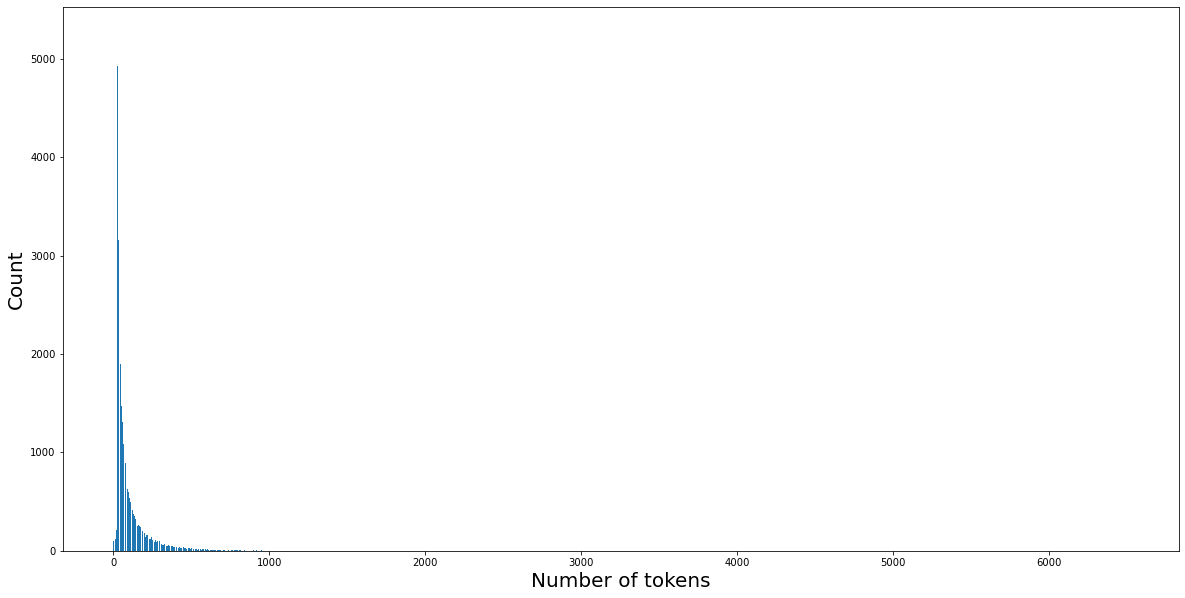

In [106]:
plt.figure(figsize=(20,10))
plt.bar(count_tp.keys(),count_tp.values())
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_ph.png')

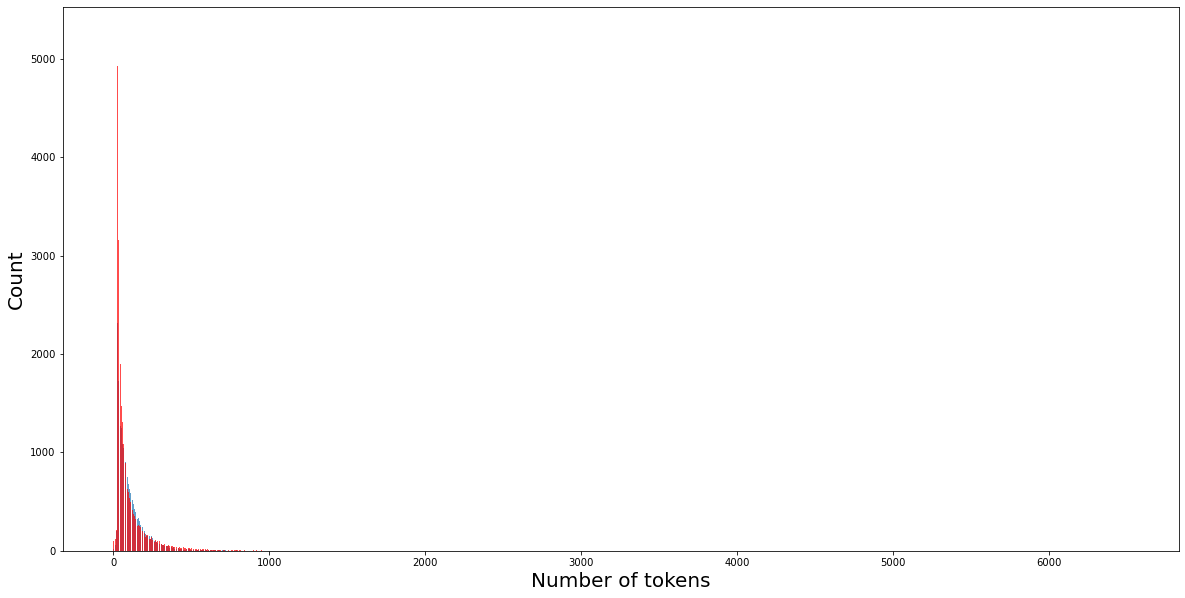

In [666]:
plt.figure(figsize=(20,10))
plt.bar(count_tg.keys(),count_tg.values(),alpha = 0.7)
plt.bar(count_tp.keys(),count_tp.values(),alpha = 0.7,color='red')
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_duo.png')

### WITH STEMMING

### Groceries and Gourmet

In [126]:
from nltk.stem import PorterStemmer

In [127]:
ps = PorterStemmer()

In [128]:
stemmed_G = [[ps.stem(token) for token in sentence.split(" ")] for sentence in gourmet_tolist]

In [132]:
print(gourmet_tolist[1])

I bought this on impulse and it comes from Japan,  which amused my family,  all those weird stamps and markings on the package. So that was fun.  It said it would take about a month to arrive and it did take that long.  I was hoping for a more interesting taste but to our family,  it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat.  The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good,  but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again.


In [131]:
print(stemmed_G[1])

['i', 'bought', 'thi', 'on', 'impuls', 'and', 'it', 'come', 'from', 'japan,', '', 'which', 'amus', 'my', 'family,', '', 'all', 'those', 'weird', 'stamp', 'and', 'mark', 'on', 'the', 'package.', 'so', 'that', 'wa', 'fun.', '', 'it', 'said', 'it', 'would', 'take', 'about', 'a', 'month', 'to', 'arriv', 'and', 'it', 'did', 'take', 'that', 'long.', '', 'i', 'wa', 'hope', 'for', 'a', 'more', 'interest', 'tast', 'but', 'to', 'our', 'family,', '', 'it', 'just', 'tast', 'a', 'bit', 'less', 'flavor', 'or', 'weaker', 'than', 'the', 'standard', 'milk', 'chocol', 'kit', 'kat.', '', 'the', 'green', 'tea', 'flavor', 'wa', 'too', 'subtl', 'for', 'the', 'sugar', 'and', 'it', 'just', 'tast', 'sweet.', 'the', 'wafer', 'were', 'veri', 'crispy,', 'and', 'that', 'wa', 'good,', '', 'but', 'it', 'tast', 'a', 'bit', 'anem', 'to', "us.i'm", 'happi', 'i', 'bought', 'it,', 'but', "don't", 'need', 'to', 'buy', 'it', 'again.']


In [137]:
print(gourmet_tokens_all[1])

['I', 'bought', 'this', 'on', 'impulse', 'and', 'it', 'comes', 'from', 'Japan', ',', 'which', 'amused', 'my', 'family', ',', 'all', 'those', 'weird', 'stamps', 'and', 'markings', 'on', 'the', 'package', '.', 'So', 'that', 'was', 'fun', '.', 'It', 'said', 'it', 'would', 'take', 'about', 'a', 'month', 'to', 'arrive', 'and', 'it', 'did', 'take', 'that', 'long', '.', 'I', 'was', 'hoping', 'for', 'a', 'more', 'interesting', 'taste', 'but', 'to', 'our', 'family', ',', 'it', 'just', 'tasted', 'a', 'bit', 'less', 'flavorful', 'or', 'weaker', 'than', 'the', 'standard', 'milk', 'chocolate', 'kit', 'kat', '.', 'The', 'green', 'tea', 'flavor', 'was', 'too', 'subtle', 'for', 'the', 'sugar', 'and', 'it', 'just', 'tasted', 'sweet', '.', 'The', 'wafers', 'were', 'very', 'crispy', ',', 'and', 'that', 'was', 'good', ',', 'but', 'it', 'tasted', 'a', 'bit', 'anemic', 'to', 'us.I', "'m", 'happy', 'I', 'bought', 'it', ',', 'but', 'do', "n't", 'need', 'to', 'buy', 'it', 'again', '.']


In [136]:
len(gourmet_tokens_all[1])

128

In [135]:
len(stemmed_G[1])

121

In [138]:
len(stemmed_G)

151254

In [139]:
stemg_count = []

for i in range(length_G):
    sG = len(stemmed_G[i])
    stemg_count.append(sG)
    
print(stemg_count)
len(stemg_count)

[33, 121, 20, 30, 108, 26, 55, 75, 79, 22, 63, 30, 55, 39, 22, 60, 38, 57, 98, 56, 113, 49, 64, 453, 27, 71, 65, 21, 89, 31, 47, 86, 103, 50, 41, 64, 49, 130, 110, 63, 72, 318, 399, 288, 125, 40, 32, 55, 48, 85, 119, 44, 49, 133, 74, 41, 57, 87, 205, 56, 166, 114, 32, 78, 40, 60, 49, 82, 87, 151, 38, 66, 118, 74, 49, 93, 25, 86, 137, 21, 53, 23, 185, 269, 20, 33, 34, 170, 29, 75, 20, 126, 24, 111, 32, 32, 65, 24, 55, 38, 34, 88, 157, 307, 31, 285, 1677, 90, 64, 560, 56, 32, 50, 118, 138, 578, 55, 111, 20, 149, 374, 27, 33, 28, 293, 158, 181, 193, 184, 38, 102, 32, 139, 115, 159, 51, 119, 77, 27, 43, 87, 108, 48, 161, 234, 37, 97, 111, 40, 44, 20, 23, 25, 29, 91, 33, 127, 26, 24, 129, 195, 37, 36, 64, 42, 88, 62, 30, 20, 82, 98, 186, 43, 20, 47, 53, 256, 117, 20, 151, 115, 25, 36, 232, 103, 268, 47, 272, 301, 92, 157, 128, 41, 171, 50, 36, 65, 74, 59, 21, 47, 49, 62, 56, 33, 26, 51, 86, 43, 32, 102, 51, 52, 35, 67, 56, 22, 118, 34, 58, 71, 58, 31, 66, 72, 21, 32, 33, 32, 80, 60, 23, 26,

151254

In [140]:
data_sg = stemg_count
count_sg = Counter(data_sg)
print(count_sg)

Counter({22: 2796, 21: 2617, 23: 2562, 24: 2471, 25: 2326, 26: 2256, 20: 2227, 27: 2085, 28: 1975, 30: 1916, 31: 1893, 29: 1875, 32: 1806, 33: 1764, 35: 1688, 34: 1618, 36: 1615, 37: 1584, 38: 1514, 39: 1483, 40: 1466, 42: 1441, 43: 1440, 44: 1430, 45: 1404, 41: 1391, 46: 1381, 47: 1380, 48: 1331, 51: 1221, 52: 1214, 49: 1213, 50: 1213, 53: 1197, 54: 1156, 55: 1149, 59: 1133, 56: 1130, 57: 1127, 64: 1069, 58: 1060, 62: 1058, 60: 1053, 65: 1035, 61: 1018, 66: 1005, 63: 984, 69: 964, 67: 959, 72: 955, 68: 949, 71: 942, 74: 937, 75: 921, 70: 910, 73: 909, 77: 885, 76: 857, 86: 846, 80: 846, 78: 828, 79: 826, 83: 812, 82: 804, 81: 800, 85: 791, 87: 783, 84: 767, 88: 741, 89: 730, 95: 721, 91: 716, 100: 708, 93: 699, 92: 697, 94: 679, 97: 675, 90: 671, 99: 646, 96: 635, 101: 630, 102: 625, 103: 618, 109: 615, 105: 595, 98: 594, 111: 594, 106: 588, 104: 576, 114: 564, 107: 564, 108: 548, 113: 544, 115: 544, 110: 530, 112: 527, 118: 520, 116: 520, 119: 508, 123: 489, 122: 487, 125: 482, 121: 

In [142]:
print(count_sg.keys())
print(count_sg.values())

dict_keys([33, 121, 20, 30, 108, 26, 55, 75, 79, 22, 63, 39, 60, 38, 57, 98, 56, 113, 49, 64, 453, 27, 71, 65, 21, 89, 31, 47, 86, 103, 50, 41, 130, 110, 72, 318, 399, 288, 125, 40, 32, 48, 85, 119, 44, 133, 74, 87, 205, 166, 114, 78, 82, 151, 66, 118, 93, 25, 137, 53, 23, 185, 269, 34, 170, 29, 126, 24, 111, 88, 157, 307, 285, 1677, 90, 560, 138, 578, 149, 374, 28, 293, 158, 181, 193, 184, 102, 139, 115, 159, 51, 77, 43, 161, 234, 37, 97, 91, 127, 129, 195, 36, 42, 62, 186, 256, 117, 232, 268, 272, 301, 92, 128, 171, 59, 52, 35, 67, 58, 80, 223, 68, 70, 162, 112, 107, 84, 306, 100, 315, 155, 109, 73, 172, 404, 226, 105, 327, 225, 54, 169, 314, 219, 212, 95, 341, 241, 202, 46, 144, 164, 173, 263, 135, 136, 148, 322, 363, 16, 17, 99, 15, 120, 313, 179, 434, 178, 61, 317, 94, 19, 131, 175, 190, 45, 104, 364, 13, 243, 81, 76, 96, 69, 106, 298, 150, 83, 524, 247, 7, 515, 238, 224, 566, 257, 116, 168, 152, 122, 163, 502, 160, 124, 358, 1389, 468, 336, 646, 101, 147, 420, 12, 134, 203, 198, 

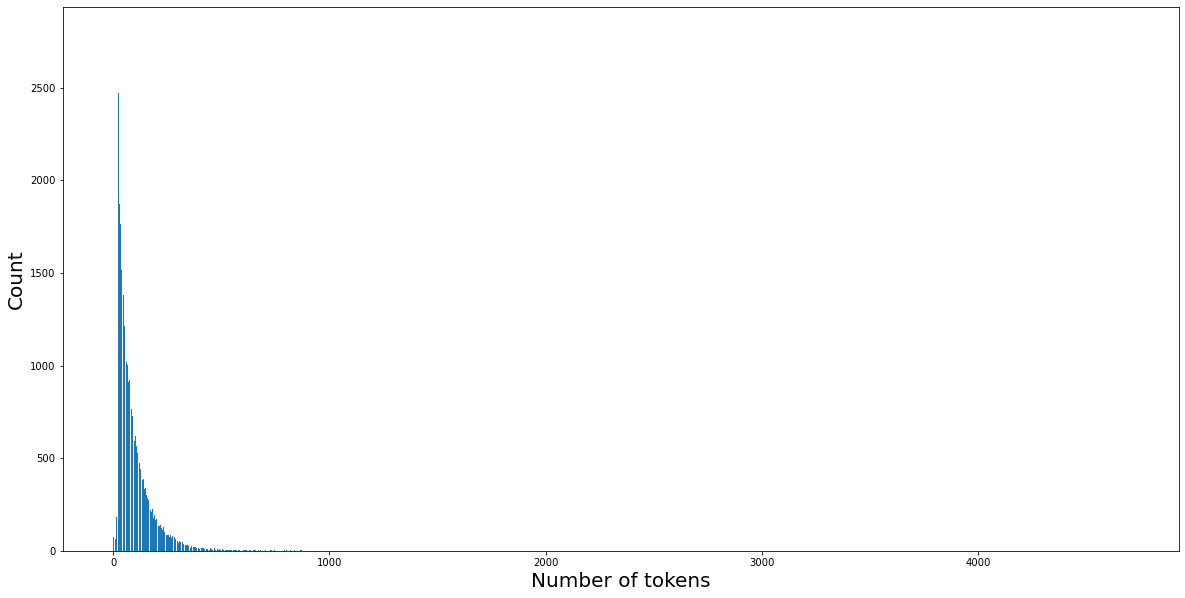

In [143]:
plt.figure(figsize=(20,10))
plt.bar(count_sg.keys(),count_sg.values())
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_g_stem.png')

### Phone

In [144]:
stemmed_P = [[ps.stem(token) for token in sentence.split(" ")] for sentence in phone_tolist]

In [145]:
stemp_count = []

for i in range(length_P):
    sP = len(stemmed_P[i])
    stemp_count.append(sP)
    
print(stemp_count)
len(stemp_count)

[37, 32, 34, 51, 24, 24, 23, 20, 44, 35, 21, 71, 48, 240, 36, 23, 46, 29, 102, 21, 34, 22, 20, 39, 58, 35, 21, 85, 7, 23, 37, 30, 36, 26, 29, 26, 31, 41, 15, 50, 43, 42, 26, 26, 302, 37, 50, 30, 32, 21, 43, 160, 22, 35, 23, 46, 58, 20, 27, 30, 21, 43, 25, 54, 30, 24, 62, 88, 21, 24, 35, 33, 53, 23, 58, 24, 20, 37, 33, 61, 45, 26, 65, 24, 36, 120, 34, 30, 183, 24, 24, 31, 74, 114, 32, 21, 31, 28, 143, 17, 23, 99, 30, 40, 64, 22, 23, 26, 32, 21, 23, 24, 33, 23, 24, 41, 49, 24, 20, 51, 93, 40, 21, 33, 33, 99, 49, 34, 7, 24, 33, 48, 181, 32, 42, 32, 24, 21, 113, 21, 146, 35, 29, 111, 37, 29, 20, 46, 20, 44, 22, 25, 21, 21, 29, 22, 27, 20, 39, 53, 22, 20, 92, 20, 22, 45, 25, 40, 22, 31, 145, 32, 61, 29, 25, 42, 20, 21, 21, 35, 30, 49, 20, 77, 28, 77, 31, 21, 85, 72, 78, 51, 112, 35, 28, 65, 76, 27, 33, 45, 26, 56, 84, 20, 21, 147, 21, 23, 20, 34, 149, 20, 97, 28, 58, 89, 141, 20, 23, 99, 71, 38, 23, 73, 29, 98, 98, 80, 124, 21, 21, 106, 48, 95, 27, 24, 21, 29, 24, 25, 27, 20, 51, 58, 22, 20

194439

In [149]:
print(phone_tokens_all[1])

['These', 'stickers', 'work', 'like', 'the', 'review', 'says', 'they', 'do', '.', 'They', 'stick', 'on', 'great', 'and', 'they', 'stay', 'on', 'the', 'phone', '.', 'They', 'are', 'super', 'stylish', 'and', 'I', 'can', 'share', 'them', 'with', 'my', 'sister', '.', ':', ')']


In [153]:
print(stemmed_P[1])

['these', 'sticker', 'work', 'like', 'the', 'review', 'say', 'they', 'do.', 'they', 'stick', 'on', 'great', 'and', 'they', 'stay', 'on', 'the', 'phone.', 'they', 'are', 'super', 'stylish', 'and', 'i', 'can', 'share', 'them', 'with', 'my', 'sister.', ':)']


In [150]:
print(stemp_count[1])

32


In [152]:
print(tokenP_count[1])

36


In [146]:
data_sp = stemp_count
count_sp = Counter(data_sp)
print(count_sp)

Counter({20: 6721, 21: 6640, 22: 6208, 23: 5567, 24: 5083, 25: 4719, 26: 4274, 27: 3992, 28: 3760, 29: 3578, 30: 3279, 31: 2998, 32: 2889, 33: 2811, 34: 2707, 35: 2660, 36: 2428, 38: 2334, 37: 2242, 39: 2220, 40: 2079, 41: 2056, 42: 1962, 45: 1861, 43: 1853, 44: 1808, 46: 1734, 48: 1645, 47: 1613, 49: 1577, 50: 1556, 52: 1490, 51: 1445, 55: 1379, 53: 1360, 54: 1323, 57: 1264, 56: 1248, 58: 1204, 60: 1196, 62: 1164, 61: 1138, 59: 1138, 65: 1095, 63: 1082, 64: 1072, 66: 1062, 67: 1039, 68: 987, 71: 960, 70: 925, 69: 903, 72: 890, 74: 871, 75: 849, 73: 835, 76: 822, 78: 807, 77: 796, 80: 792, 79: 787, 86: 727, 82: 725, 81: 705, 83: 701, 84: 680, 88: 676, 85: 652, 87: 647, 89: 643, 91: 621, 90: 612, 94: 599, 95: 594, 92: 585, 100: 569, 99: 559, 93: 542, 96: 542, 98: 539, 101: 530, 97: 509, 103: 507, 102: 501, 104: 494, 107: 483, 112: 475, 19: 471, 108: 458, 105: 458, 106: 450, 115: 446, 109: 431, 111: 423, 118: 413, 110: 410, 116: 410, 113: 409, 114: 399, 125: 387, 122: 387, 117: 381, 124:

In [147]:
print(count_sp.keys())
print(count_sp.values())

dict_keys([37, 32, 34, 51, 24, 23, 20, 44, 35, 21, 71, 48, 240, 36, 46, 29, 102, 22, 39, 58, 85, 7, 30, 26, 31, 41, 15, 50, 43, 42, 302, 160, 27, 25, 54, 62, 88, 33, 53, 61, 45, 65, 120, 183, 74, 114, 28, 143, 17, 99, 40, 64, 49, 93, 181, 113, 146, 111, 92, 145, 77, 72, 78, 112, 76, 56, 84, 147, 149, 97, 89, 141, 38, 73, 98, 80, 124, 106, 95, 19, 66, 63, 52, 179, 11, 90, 199, 128, 57, 47, 1, 125, 117, 123, 86, 67, 154, 176, 118, 79, 135, 2, 75, 5, 142, 60, 293, 119, 203, 354, 133, 157, 155, 229, 137, 214, 260, 136, 115, 127, 18, 59, 204, 173, 110, 333, 209, 68, 129, 174, 55, 108, 103, 197, 477, 318, 245, 122, 452, 311, 486, 156, 400, 255, 81, 320, 295, 162, 250, 271, 233, 278, 130, 222, 341, 132, 234, 224, 225, 309, 202, 170, 94, 215, 163, 152, 223, 109, 158, 159, 185, 100, 189, 834, 323, 96, 91, 822, 667, 317, 507, 87, 294, 192, 289, 263, 249, 171, 330, 247, 172, 138, 346, 208, 316, 104, 488, 497, 448, 230, 1041, 476, 190, 140, 460, 464, 101, 347, 3291, 82, 107, 69, 219, 286, 238, 182

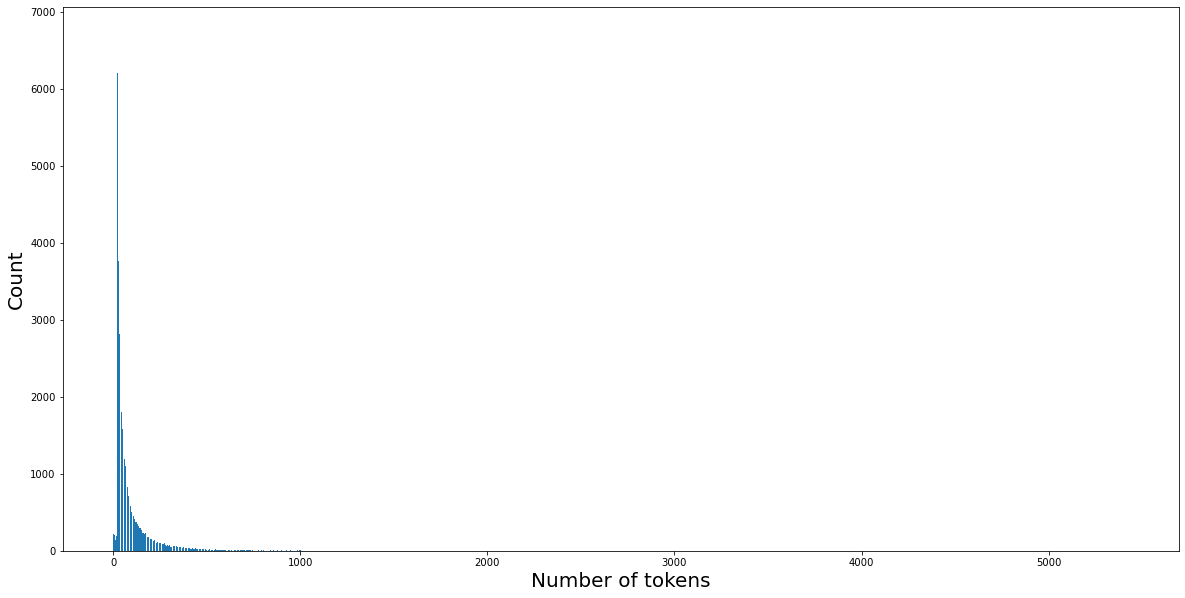

In [148]:
plt.figure(figsize=(20,10))
plt.bar(count_sp.keys(),count_sp.values())
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_p_stem.png')

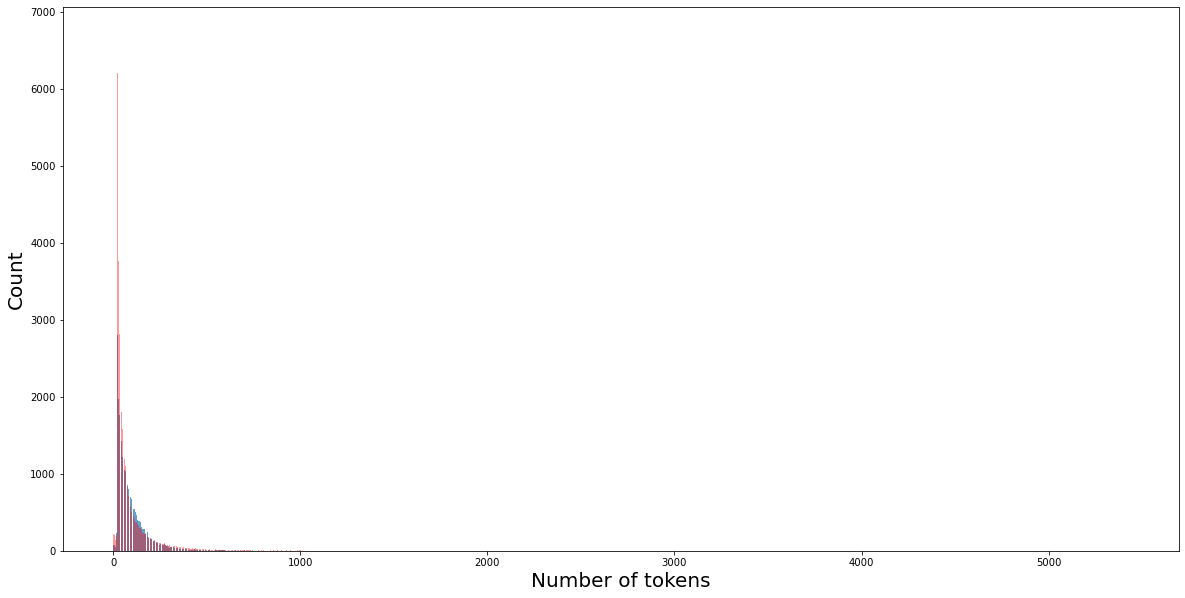

In [665]:
plt.figure(figsize=(20,10))
plt.bar(count_sg.keys(),count_sg.values(),alpha=0.7)
plt.bar(count_sp.keys(),count_sp.values(),alpha=0.4,color='red')
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_duo_stem.png')

### TOKENIZATION AND STEMMING (WITH STOPWORDS REMOVED)

### no stemming

In [259]:
#gourmet
tokengsw_count = []

for i in range(length_G):
    tgsw = len(gourmet_tokenize[i])
    tokengsw_count.append(tgsw)
    
print(tokengsw_count)
len(tokengsw_count)

[31, 117, 20, 30, 111, 28, 56, 76, 81, 22, 65, 29, 54, 39, 21, 62, 37, 56, 99, 54, 114, 51, 65, 474, 26, 71, 66, 21, 91, 32, 44, 88, 111, 52, 40, 57, 49, 127, 106, 65, 72, 314, 421, 283, 121, 40, 33, 61, 50, 86, 117, 44, 49, 134, 71, 43, 58, 84, 213, 56, 167, 115, 31, 81, 41, 57, 54, 88, 87, 150, 38, 63, 119, 73, 54, 96, 23, 94, 134, 20, 53, 25, 196, 290, 20, 35, 35, 172, 31, 70, 21, 122, 22, 115, 33, 34, 65, 24, 56, 39, 34, 90, 159, 316, 31, 286, 1727, 86, 64, 571, 56, 30, 50, 124, 140, 581, 53, 113, 20, 148, 374, 28, 32, 27, 289, 161, 189, 189, 192, 38, 102, 33, 143, 115, 165, 48, 125, 75, 29, 47, 92, 108, 49, 159, 237, 36, 100, 117, 41, 44, 19, 23, 25, 31, 94, 32, 126, 24, 21, 130, 208, 36, 39, 60, 44, 87, 60, 29, 20, 80, 107, 192, 44, 20, 50, 53, 268, 120, 21, 155, 109, 26, 37, 241, 97, 277, 51, 280, 311, 95, 172, 134, 42, 183, 47, 36, 61, 70, 60, 21, 42, 50, 66, 56, 33, 27, 53, 89, 52, 32, 107, 51, 50, 36, 66, 59, 23, 115, 33, 58, 75, 54, 32, 73, 68, 23, 33, 31, 33, 82, 58, 23, 25

151254

In [260]:
data_gsw = tokengsw_count
count_gsw = Counter(data_gsw)
print(count_gsw)

Counter({21: 2750, 22: 2746, 23: 2500, 24: 2464, 25: 2314, 20: 2274, 26: 2149, 27: 2047, 28: 1960, 29: 1959, 31: 1919, 30: 1823, 33: 1750, 32: 1749, 36: 1647, 34: 1634, 35: 1629, 37: 1594, 38: 1497, 40: 1457, 41: 1427, 42: 1423, 39: 1420, 43: 1402, 46: 1398, 45: 1394, 44: 1352, 47: 1345, 48: 1278, 50: 1240, 52: 1229, 51: 1220, 49: 1213, 54: 1146, 57: 1134, 56: 1126, 53: 1126, 55: 1112, 59: 1105, 58: 1078, 62: 1031, 60: 1025, 65: 1023, 63: 1017, 61: 1016, 64: 999, 72: 965, 67: 959, 70: 956, 69: 947, 66: 931, 76: 918, 68: 918, 73: 915, 71: 910, 74: 904, 75: 879, 78: 853, 77: 853, 81: 839, 79: 813, 80: 812, 83: 803, 87: 792, 84: 789, 86: 765, 88: 747, 89: 739, 90: 730, 85: 725, 82: 717, 94: 710, 91: 709, 93: 693, 96: 666, 95: 662, 92: 659, 97: 659, 98: 653, 103: 623, 99: 622, 102: 622, 101: 617, 106: 611, 100: 609, 104: 606, 105: 594, 113: 571, 107: 569, 109: 565, 112: 561, 111: 556, 108: 550, 110: 544, 116: 525, 115: 511, 117: 510, 114: 506, 121: 496, 123: 493, 120: 491, 118: 483, 119: 4

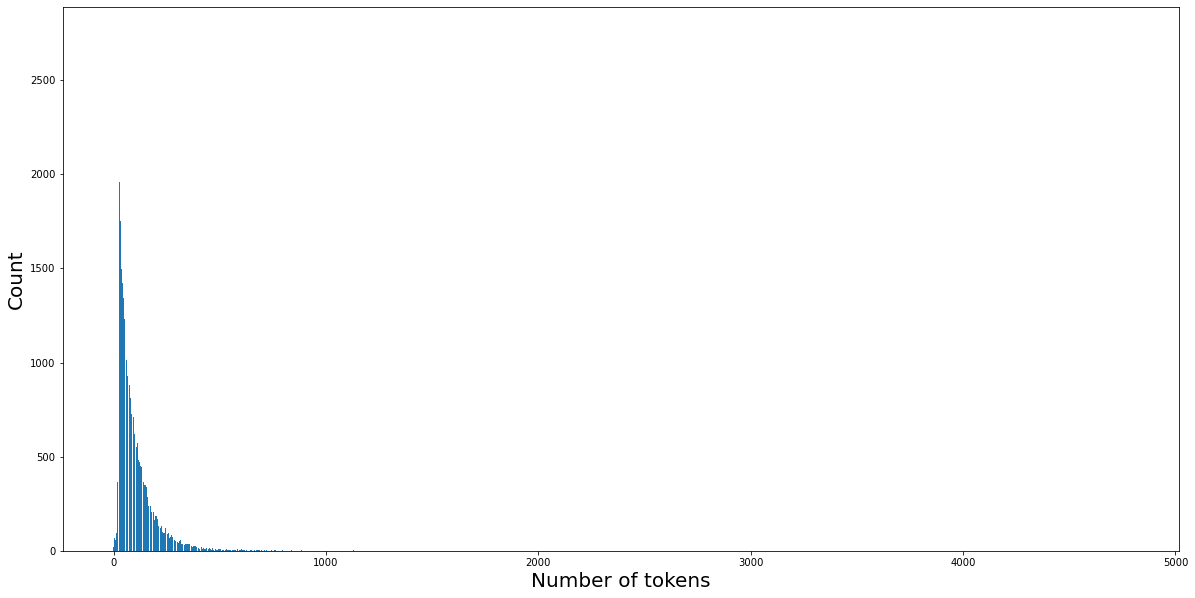

In [261]:
plt.figure(figsize=(20,10))
plt.bar(count_gsw.keys(),count_gsw.values())
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_gsw.png')

In [262]:
#phone
tokenpsw_count = []

for i in range(length_P):
    tpsw = len(phone_tokenize[i])
    tokenpsw_count.append(tpsw)
    
print(tokenpsw_count)
len(tokenpsw_count)

[39, 31, 34, 52, 23, 23, 24, 20, 46, 35, 22, 74, 48, 245, 37, 23, 47, 29, 106, 21, 33, 22, 20, 39, 57, 35, 22, 85, 7, 23, 37, 32, 37, 26, 29, 28, 30, 41, 16, 53, 43, 43, 26, 26, 309, 36, 49, 29, 31, 20, 43, 177, 24, 35, 25, 47, 60, 20, 28, 30, 21, 43, 25, 55, 30, 25, 62, 88, 21, 25, 36, 35, 57, 22, 56, 24, 20, 38, 33, 62, 44, 26, 65, 22, 36, 128, 34, 31, 179, 22, 22, 31, 74, 119, 32, 21, 33, 25, 145, 17, 22, 96, 30, 41, 69, 20, 25, 26, 33, 21, 26, 24, 33, 23, 23, 40, 51, 22, 18, 53, 94, 40, 20, 33, 33, 99, 49, 37, 7, 24, 32, 49, 187, 34, 40, 34, 23, 20, 118, 21, 148, 35, 27, 107, 36, 27, 20, 45, 20, 39, 22, 25, 21, 22, 29, 22, 27, 20, 40, 53, 22, 20, 96, 21, 22, 46, 24, 40, 22, 32, 145, 33, 60, 29, 26, 44, 20, 21, 21, 35, 30, 50, 20, 79, 29, 79, 32, 21, 92, 73, 79, 51, 109, 37, 28, 65, 81, 27, 34, 47, 24, 57, 88, 20, 20, 147, 21, 23, 20, 34, 159, 18, 100, 29, 55, 90, 138, 20, 22, 95, 67, 39, 22, 72, 30, 96, 94, 82, 132, 21, 21, 113, 50, 93, 28, 25, 21, 32, 24, 25, 27, 20, 50, 58, 21, 2

194439

In [264]:
data_psw = tokenpsw_count
count_psw = Counter(data_psw)
print(count_psw)

Counter({21: 6620, 22: 6098, 20: 6057, 23: 5562, 24: 5069, 25: 4552, 26: 4277, 27: 4090, 28: 3688, 29: 3469, 30: 3270, 31: 3184, 32: 2910, 33: 2747, 34: 2626, 35: 2590, 36: 2511, 37: 2401, 38: 2247, 39: 2195, 40: 2080, 42: 1983, 41: 1959, 43: 1932, 44: 1861, 45: 1805, 47: 1666, 46: 1642, 50: 1611, 49: 1605, 48: 1596, 52: 1462, 51: 1435, 53: 1389, 54: 1314, 55: 1262, 59: 1260, 56: 1241, 57: 1238, 58: 1214, 61: 1182, 60: 1157, 64: 1116, 62: 1111, 63: 1099, 65: 1041, 66: 1013, 67: 1008, 68: 1008, 71: 975, 69: 951, 72: 922, 70: 905, 73: 880, 75: 832, 78: 816, 76: 803, 79: 786, 74: 777, 80: 769, 81: 759, 77: 753, 82: 737, 83: 729, 84: 683, 85: 681, 87: 677, 88: 656, 19: 655, 89: 646, 90: 643, 86: 621, 91: 610, 93: 605, 94: 583, 98: 579, 92: 575, 95: 570, 99: 555, 102: 554, 96: 544, 101: 542, 97: 517, 100: 505, 105: 480, 103: 476, 104: 470, 109: 468, 108: 456, 107: 441, 113: 439, 111: 431, 106: 430, 118: 423, 110: 416, 114: 414, 115: 404, 116: 404, 112: 400, 126: 396, 119: 394, 122: 391, 121

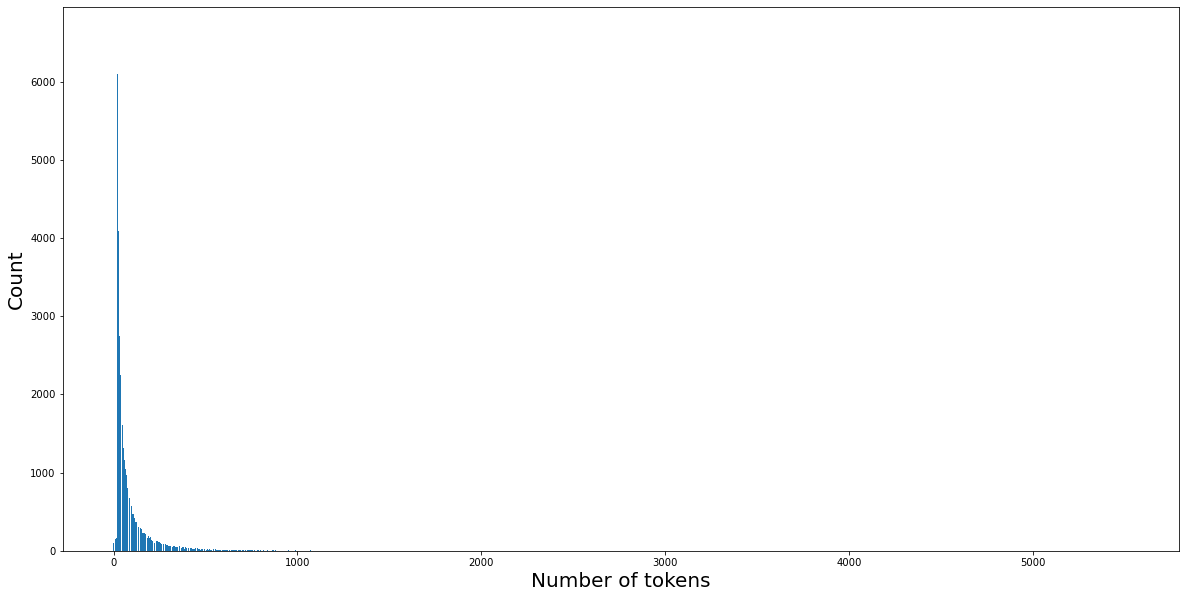

In [265]:
plt.figure(figsize=(20,10))
plt.bar(count_psw.keys(),count_psw.values())
plt.xlabel("Number of tokens",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.savefig('token_count_psw.png')

### stemming

In [270]:
stemgsw = []

for i in range(length_G):
    gsw = []
    for k in filtersw_g[i]:
        stemmed_gsw = ps.stem(k)
        gsw.append(stemmed_gsw)
    stemgsw.append(gsw)

['bought', 'impuls', 'come', 'japan', 'amus', 'famili', 'weird', 'stamp', 'mark', 'packag', 'fun', 'said', 'would', 'take', 'month', 'arriv', 'take', 'long', 'hope', 'interest', 'tast', 'famili', 'tast', 'bit', 'less', 'flavor', 'weaker', 'standard', 'milk', 'chocol', 'kit', 'kat', 'green', 'tea', 'flavor', 'subtl', 'sugar', 'tast', 'sweet', 'wafer', 'crispi', 'good', 'tast', 'bit', 'anem', 'us', 'happi', 'bought', 'need', 'buy']


In [272]:
print(filtersw_g[2])
print(stemgsw[2])

['really', 'good', 'great', 'gift', 'fan', 'green', 'tea', 'expensive', 'purchase', 'candy', 'across', 'sea']
['realli', 'good', 'great', 'gift', 'fan', 'green', 'tea', 'expens', 'purchas', 'candi', 'across', 'sea']


In [273]:
stempsw = []

for i in range(length_P):
    psw = []
    for k in filtersw_p[i]:
        stemmed_psw = ps.stem(k)
        psw.append(stemmed_psw)
    stempsw.append(psw)
print(stempsw[1])

['sticker', 'work', 'like', 'review', 'say', 'stick', 'great', 'stay', 'phone', 'super', 'stylish', 'share', 'sister']


In [274]:
print(filtersw_p[2])
print(stempsw[2])

['awesome', 'make', 'phone', 'look', 'stylish', 'used', 'one', 'far', 'almost', 'year', 'believe', 'one', 'year', 'great', 'quality']
['awesom', 'make', 'phone', 'look', 'stylish', 'use', 'one', 'far', 'almost', 'year', 'believ', 'one', 'year', 'great', 'qualiti']


## INDICATIVE WORDS

### lemmatize 

In [281]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [288]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [292]:
lemgsw = []

for i in range(length_G):
    lempg = []
    for k in filtersw_g[i]:
        lemmed_gsw = lem.lemmatize(k)
        lempg.append(lemmed_gsw)
    lemgsw.append(lempg)

In [293]:
print(stemgsw[1])

['bought', 'impuls', 'come', 'japan', 'amus', 'famili', 'weird', 'stamp', 'mark', 'packag', 'fun', 'said', 'would', 'take', 'month', 'arriv', 'take', 'long', 'hope', 'interest', 'tast', 'famili', 'tast', 'bit', 'less', 'flavor', 'weaker', 'standard', 'milk', 'chocol', 'kit', 'kat', 'green', 'tea', 'flavor', 'subtl', 'sugar', 'tast', 'sweet', 'wafer', 'crispi', 'good', 'tast', 'bit', 'anem', 'us', 'happi', 'bought', 'need', 'buy']


In [294]:
print(lemgsw[1])

['bought', 'impulse', 'come', 'japan', 'amused', 'family', 'weird', 'stamp', 'marking', 'package', 'fun', 'said', 'would', 'take', 'month', 'arrive', 'take', 'long', 'hoping', 'interesting', 'taste', 'family', 'tasted', 'bit', 'le', 'flavorful', 'weaker', 'standard', 'milk', 'chocolate', 'kit', 'kat', 'green', 'tea', 'flavor', 'subtle', 'sugar', 'tasted', 'sweet', 'wafer', 'crispy', 'good', 'tasted', 'bit', 'anemic', 'u', 'happy', 'bought', 'need', 'buy']


In [295]:
print(filtersw_g[1])

['bought', 'impulse', 'comes', 'japan', 'amused', 'family', 'weird', 'stamps', 'markings', 'package', 'fun', 'said', 'would', 'take', 'month', 'arrive', 'take', 'long', 'hoping', 'interesting', 'taste', 'family', 'tasted', 'bit', 'less', 'flavorful', 'weaker', 'standard', 'milk', 'chocolate', 'kit', 'kat', 'green', 'tea', 'flavor', 'subtle', 'sugar', 'tasted', 'sweet', 'wafers', 'crispy', 'good', 'tasted', 'bit', 'anemic', 'us', 'happy', 'bought', 'need', 'buy']


In [296]:
lempsw = []

for i in range(length_P):
    lempp = []
    for k in filtersw_p[i]:
        lemmed_psw = lem.lemmatize(k)
        lempp.append(lemmed_psw)
    lempsw.append(lempp)

### Highest counts of words in the datasets excluding stopwords

In [303]:
lemgsw_counts = Counter(x for sublist in lemgsw for x in sublist)
print(lemgsw_counts)

Counter({'like': 98027, 'taste': 89602, 'flavor': 76490, 'good': 75078, 'coffee': 58795, 'one': 58618, 'tea': 49155, 'product': 47768, 'great': 46430, 'would': 41146, 'make': 39191, 'love': 36900, 'really': 36039, 'cup': 33069, 'get': 32501, 'much': 31946, 'use': 31240, 'chocolate': 30494, 'little': 29948, 'sugar': 29026, 'also': 28837, 'drink': 27704, 'water': 26745, 'time': 26659, 'well': 24873, 'sweet': 24864, 'bag': 24753, 'better': 23757, 'try': 21708, 'bit': 21528, 'even': 21520, 'price': 21363, 'buy': 21173, 'food': 20984, 'tried': 20942, 'bar': 20672, 'snack': 20538, 'nice': 20205, 'eat': 19899, 'box': 19779, 'add': 19174, 'think': 18605, 'go': 18306, 'brand': 18184, 'way': 18096, 'used': 17921, 'calorie': 17911, 'find': 17301, '2': 17135, 'first': 17049, 'best': 16929, 'lot': 16798, 'free': 16710, 'made': 16463, 'mix': 16266, '1': 16240, 'amazon': 16203, 'organic': 16163, 'thing': 16124, 'ingredient': 15969, 'milk': 15761, 'oil': 15578, 'say': 15550, 'want': 15484, 'day': 1529

In [304]:
lempsw_counts = Counter(x for sublist in lempsw for x in sublist)
print(lempsw_counts)

Counter({'phone': 197718, 'case': 168572, 'one': 95735, 'like': 75819, 'great': 68915, 'battery': 67550, 'screen': 64009, 'use': 63229, 'work': 62648, 'good': 60408, 'would': 55730, 'charge': 55547, 'well': 53705, 'get': 52622, 'iphone': 49758, 'fit': 49707, 'time': 49385, 'charger': 46855, 'product': 45785, 'device': 43885, 'really': 38749, 'also': 37870, 'look': 35460, 'protector': 35244, '2': 35170, 'love': 33790, '5': 32654, 'much': 31826, 'back': 31641, 'price': 30841, 'nice': 30359, 'little': 30291, 'make': 30186, 'usb': 29523, '4': 29448, 'quality': 29387, 'charging': 29122, 'cable': 28336, 'easy': 27876, 'even': 27431, 'button': 27399, 'need': 26168, '3': 26010, 'still': 25686, 'used': 25647, 'power': 25370, 'cover': 25333, 'thing': 25069, 'using': 24870, 'feel': 24642, 'got': 24378, 'better': 24059, 'day': 23868, 'bought': 23622, 'two': 23489, 'come': 23104, 'go': 21900, 'first': 21583, 'recommend': 21528, 'port': 21125, 'problem': 21076, 'sound': 20873, 'take': 20499, 'car': 

In [316]:
lemgsw_counts.most_common(10)

[('like', 98027),
 ('taste', 89602),
 ('flavor', 76490),
 ('good', 75078),
 ('coffee', 58795),
 ('one', 58618),
 ('tea', 49155),
 ('product', 47768),
 ('great', 46430),
 ('would', 41146)]

In [318]:
lempsw_counts.most_common(10)

[('phone', 197718),
 ('case', 168572),
 ('one', 95735),
 ('like', 75819),
 ('great', 68915),
 ('battery', 67550),
 ('screen', 64009),
 ('use', 63229),
 ('work', 62648),
 ('good', 60408)]

### Wordclouds

In [319]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

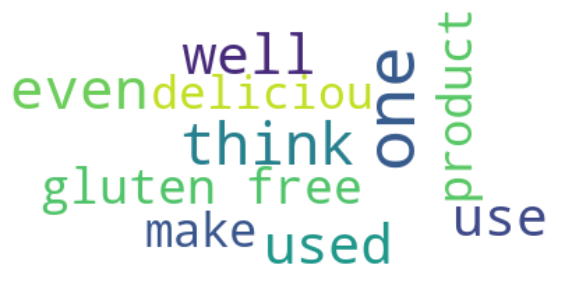

<Figure size 720x1440 with 0 Axes>

In [634]:
corpus = " ".join(" ".join(x) for x in lemgsw)
df_wordcloud = WordCloud(background_color='white',max_font_size = 50, max_words=10).generate(corpus)

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wcg.png')

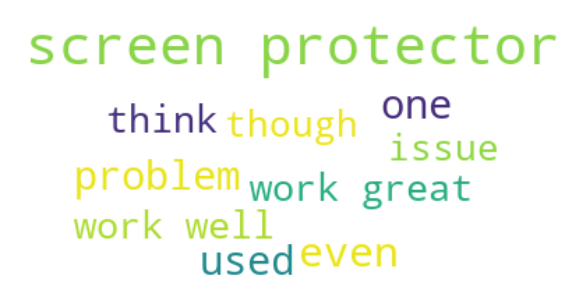

<Figure size 720x1440 with 0 Axes>

In [635]:
corpus = " ".join(" ".join(x) for x in lempsw)
df_wordcloud = WordCloud(background_color='white',max_font_size = 50,max_words=10).generate(corpus)

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('wcp.png')

### TF-IDF

In [423]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
vec = TfidfVectorizer()

In [454]:
detoken_g = [TreebankWordDetokenizer().detokenize(i) for i in filtersw_g]

In [456]:
detoken_p = [TreebankWordDetokenizer().detokenize(i) for i in filtersw_p]

In [627]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
vectors_g = vectorizer.fit_transform(detoken_g[:10000])

In [628]:
print("n_samples: %d, n_features: %d" % vectors_g.shape)

n_samples: 10000, n_features: 20735


In [629]:
tf_idf = pd.DataFrame(vectors_g.todense()).iloc[:6]  
tf_idf.columns = vectorizer.get_feature_names()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['review'+ str(i) for i in range(1, 7)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:10] 

# Print the first 10 words 
print(tfidf_matrix.drop(columns=['count']).head(10))

            review1   review2   review3   review4   review5   review6
kit        0.353264  0.170339  0.000000  0.000000  0.164602  0.382163
subtle     0.000000  0.136509  0.000000  0.340128  0.131912  0.306264
green      0.000000  0.097080  0.262714  0.000000  0.093810  0.435605
kat        0.415159  0.200184  0.000000  0.000000  0.193442  0.000000
flavor     0.122986  0.059302  0.000000  0.147758  0.057305  0.266094
tea        0.000000  0.067216  0.181898  0.000000  0.064953  0.301605
bit        0.355496  0.171415  0.000000  0.000000  0.082821  0.000000
expensive  0.220544  0.000000  0.287783  0.000000  0.000000  0.000000
good       0.000000  0.052836  0.142984  0.131648  0.051057  0.118541
kats       0.000000  0.000000  0.000000  0.000000  0.000000  0.467407


In [630]:
vectors_p = vectorizer.fit_transform(detoken_p[:10000])

In [631]:
print("n_samples: %d, n_features: %d" % vectors_p.shape)

n_samples: 10000, n_features: 20853


In [633]:
tf_idf = pd.DataFrame(vectors_p.todense()).iloc[:6]  
tf_idf.columns = vectorizer.get_feature_names()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['review'+ str(i) for i in range(1, 7)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:10] 

# Print the first 10 words 
print(tfidf_matrix.drop(columns=['count']).head(10))

           review1   review2   review3   review4   review5   review6
stylish   0.000000  0.317188  0.363737  0.000000  0.000000  0.000000
great     0.000000  0.123456  0.141574  0.202964  0.116884  0.000000
awesome   0.000000  0.000000  0.305250  0.000000  0.252016  0.000000
like      0.219181  0.131304  0.000000  0.000000  0.000000  0.191252
year      0.000000  0.000000  0.527645  0.000000  0.000000  0.000000
stick     0.239151  0.286534  0.000000  0.000000  0.000000  0.000000
make      0.000000  0.000000  0.218675  0.000000  0.000000  0.277753
elevated  0.000000  0.000000  0.000000  0.000000  0.475376  0.000000
daughter  0.000000  0.000000  0.000000  0.000000  0.000000  0.471926
one       0.000000  0.000000  0.267088  0.191452  0.000000  0.000000
